In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [4]:
df=pd.read_csv('mnist_train.csv')

In [5]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.sample()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
55072,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


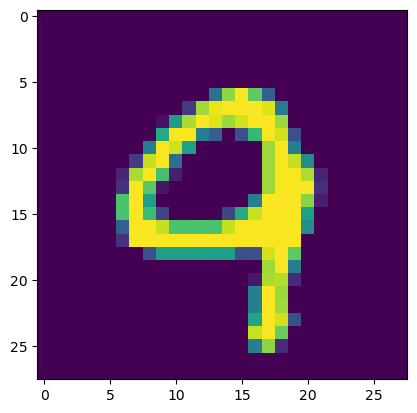

In [11]:
plt.imshow(df.iloc[55072,1:].values.reshape(28,28))
plt.show()

In [13]:
x=df.iloc[:,1:]
y= df.iloc[:,0]

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
knn = KNeighborsClassifier() 

In [17]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(x_test)

C:\Users\Dell\anaconda_3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
accuracy_score(y_test,y_pred)

0.97075

In [20]:
pca = PCA(n_components=None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [22]:
list(enumerate(np.cumsum(pca.explained_variance_ratio_)))

[(0, 0.09692477343294399),
 (1, 0.16784457164212943),
 (2, 0.22975895111311037),
 (3, 0.2836305954900044),
 (4, 0.3322542052745443),
 (5, 0.37535645668955936),
 (6, 0.408194881843892),
 (7, 0.43708450917659725),
 (8, 0.4647014100872238),
 (9, 0.4882373912287487),
 (10, 0.5093510607349144),
 (11, 0.5295819579226325),
 (12, 0.5466949088829901),
 (13, 0.5635543075949225),
 (14, 0.5793888503334905),
 (15, 0.5942279371801579),
 (16, 0.6074337938430161),
 (17, 0.6202060048156279),
 (18, 0.6320730154217896),
 (19, 0.643568154839966),
 (20, 0.6541843028961453),
 (21, 0.6642614841962969),
 (22, 0.6737706011632647),
 (23, 0.6829036997291924),
 (24, 0.6917419283392081),
 (25, 0.7002030690068906),
 (26, 0.7083559925749523),
 (27, 0.7162518147945265),
 (28, 0.723709857408141),
 (29, 0.7305975808577047),
 (30, 0.7371750653449718),
 (31, 0.7436537083837783),
 (32, 0.7496810643020674),
 (33, 0.7555481683710682),
 (34, 0.7612743987200734),
 (35, 0.7667284648439662),
 (36, 0.7717475000044105),
 (37, 0.7

In [23]:
pca = PCA(n_components=86)
x_trained_trf = pca.fit_transform(x_train)
x_tested_trf = pca.transform(x_test)

In [24]:
knnn = KNeighborsClassifier()

In [25]:
knnn.fit(x_trained_trf,y_train)

KNeighborsClassifier()

In [26]:
y_pred = knnn.predict(x_tested_trf)

C:\Users\Dell\anaconda_3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
accuracy_score(y_test,y_pred)

0.9754166666666667